In [45]:
import json
import pandas as pd
from pysentimiento.hate import data_dir

test_path = os.path.join(data_dir, f"hateval2019_es_test.csv")

df = pd.read_csv(test_path).set_index("id")

path = '../../evaluations/hate_speech/task_b/beto_pred.json'
with open(path) as f:
    evaluations = json.load(f)

preds = evaluations["predictions"]["hate_speech"]
print(f"We have {len(preds)} predictions")

assert all(len(p) == len(df) for p in preds)

We have 10 predictions


In [46]:
import numpy as np

df.loc[:, ["HS_pred", "TR_pred", "AG_pred"]] = (np.array(preds)>0).mean(0)

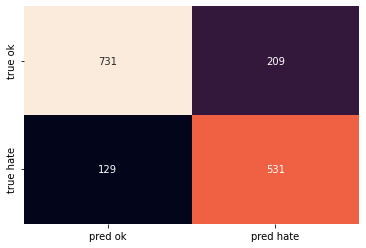

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(df["HS"], df["HS_pred"] > 0.5)

sns.heatmap(cm, annot=True, fmt="d", cbar=None,
    yticklabels=["true ok", "true hate"],
    xticklabels=["pred ok", "pred hate"]
)

plt.savefig("task_b_confusion_matrix.pdf", bbox_inches="tight")

In [20]:
tp = df[ df["HS"] & (df["HS_pred"] > 0.5)]
tn = df[ ~df["HS"] & (df["HS_pred"] <= 0.5)]
fp = df[ ~df["HS"] & (df["HS_pred"] > 0.5)]
fn = df[ df["HS"] & (df["HS_pred"] <= 0.5)]

prec = tp.shape[0] / (tp.shape[0] + fp.shape[0])
recall = tp.shape[0] / (tp.shape[0] + fn.shape[0])

f1 = 2 * prec * recall / (prec + recall)

print(len(fp))
print(len(fn))
prec, recall, f1

209
129


(0.7175675675675676, 0.8045454545454546, 0.7585714285714286)

Mucho más recall que precisión...veamos los false positives

### Falta de contexto

- @UbedaJoseA @WalkingDead_AMC Perro cállate ala puta (FP)
- @iancandado Es sudaca como.tu
- @Stopfalsasdenun Pero que tienes en la cabesaaaa?(con voz de sudaca de mierda)
- @_Lassana_ Me la has puesto como un tanque apuntando a un campanario negrata		
- @odiomistweets Es una analogía pendejo sudaca	
- - Es verdad Sr. GC q mientras le echaban ácido junto con cal viva por la espalda, le daban con una barra de hierro y le tiraban piedras usted amenazó e insultó a los 200 inmigrantes que saltaban la valla? - No, yo sólo les dije "Mohas, no continueis así que eso eso duele" (quoted tweet)
- @ElQuemaMarias te parece que un sudaca tatuado excelentemente bien dotado y carismático no es buen ejemplo?
- @HQGatica @AnglicaVillarN1 Este sueco con cara de bolita .xq eso es este aspiracional desclasado . x dignidad debería irse . no lo hará xq este sudaca no la tiene !!!
- @SOFIAGAVIRIAC Ambas cosas y Sudaca (lo que eso signifique)
- @SleeplessXenn @envdiaN Este finde te recojo y vamos al barrio negrata de envdian
- @elmundoes El q quería quitar concertinas y luego quitarse a los inmigrantes !!



## Reporte de racismo o uso irónico

- Una cosa que le pasó a una amiga mexicana en Barcelona. Una chica repartía flyers en castellano y catalán, le dio uno a mí amiga en catalán y al segundo se lo quitó y se lo dio en castellano. -No, déjalo que entiendo catalán -Ah, es que como te he visto cara de sudaca Racismo 0 https://t.co/aNYjtZS9l4
- @saludhernandezm Esas personas que extrañan dictaduras, cualquier dictadura, aún más si son las ibéricas que ponen como eje a Madrid; su cultura, política e idioma sobre la idiosincrasia de los demás. Esos mismos que añoran a Franco y viven en un país 'Sudaca' creyéndose dueños de la verdad.	
- @caciena después sigo siendo un sudaca pero bueno
- @ArturoMonteduro Pues tienes toda la razón del mundo. Y lo peor es que seguro que tenía papeles y DNI español, pero queda mejor decir "argelino" o "uno d'estos del top manta", "puto inmigrante", o "moro mierda" y ya pues matas dos pájaros de un tiro.
- Obvio me ofendo cuando algn Sudaca hace algn comentario presuponiendo que los mexicanos somos feos, o que el pas est de la verga. Entre mexicanos podemos hablar mierda de Mxico, pero que a ningn pinche extranjero se le ocurra, porque va a haber pedo!
- @MifasolMaite Sudaca? K racista eres
- TODOS LOS INMIGRANTES Y GITANOS FUERA!!! Menos: el colombiano que me vende coca, el negro que me consigue putas, el moro que me pasa costo y el gitano que me vende maría.


### Mal etiquetados:
- Las superabuelas le dan bien al atracador negrata. (FP)
- @odiomistweets Es una analogía pendejo sudaca	
- @sanchezcastejon @desdelamoncloa, Gonzalo no es negro, no es moro, no es un inmigrante ilegal. En definitiva, no es alguien que viene a España a vivir a costa del trabajo de los demás. No pide una paguita, ni un subsidio, ni una casa. Pide, simplemente, un trabajo. Y es ESPAÑOL. https://t.co/gcYYzvCyrY
- @Stopfalsasdenun Pero que tienes en la cabesaaaa?(con voz de sudaca de mierda)
- @MONOAKD22 @InvictosSomos Deja de decir estupideces Sudaca. Ustedes son los primeros en decir que Mexico se venga a CONMEBOL y cuando quiere estar se ponen a llorar.
- @ClaudiaMartos1 @IreneSanz14 @MissMensi Con la cara de monos que tienen así guarros de donde iban a ser? Colombianos, la policia se pudo los guantes y los hizo salir a todos al rellano, al sudaka que es asqueroso, el típico barrigón sucio con camiseta a tirantes, a ese le hicieron hasta soplar para ver si iba
- @brelocuente @elmundoes Hay buenos inmigrantes como los chinos,japoneses o sikhs y luego estn los arabes, africanos y latinoamericanos donde la mayora de sus jovenes se creen negrata del bronx.
- @chuchocalega @jover_62 @record_mexico Y entonfes por que la final de vuelta nunca se juega en casa del club Mexicano? Entonces por que Arjensimia tiene 6 cupos y Mexico solo 2? Esa copa sudaca si quisiera ya la hubiera ganado Mexico. Claro sin las trampas de los sudacachangos en especial Narjensimia y su droga.
- muy tuya y muy empoderada pero sales con un drogadicto que está haciendo un PCPI y va de skater gangsta nigga y encima eres negra que gastas una cara de mandril que te falta lanzarte heces con tu padre el sudaca
- @HQGatica @AnglicaVillarN1 Este sueco con cara de bolita .xq eso es este aspiracional desclasado . x dignidad debería irse . no lo hará xq este sudaca no la tiene !!!
- @SebastiaMDQ @gaston67588681 @jorgehalperin @viajeroviolento @FranciscoJULIEK ja ja y como conseguiste laburo en Alemania siendo un sudaca berzota coprofágico ? Alemania, lindo país, muy adelantado, sin el cáncer peronista es mucho más fácil progresar.
-  Es verdad Sr. GC q mientras le echaban ácido junto con cal viva por la espalda, le daban con una barra de hierro y le tiraban piedras usted amenazó e insultó a los 200 inmigrantes que saltaban la valla? - No, yo sólo les dije "Mohas, no continueis así que eso eso duele" (quoted tweet)

### Errores x palabras espúrias
- Los fascistas salen de la ratonera para atacar a los 100 inmigrantes que han logrado saltar la valla de Ceuta. Asco de prensa y partidos políticos que se pelean por lograr los votos de los fascistas. Ningún ser humano es ilegal. #Ceuta #FelizMiércoles https://t.co/iAIqTj9qmi
- @saludhernandezm Esas personas que extrañan dictaduras, cualquier dictadura, aún más si son las ibéricas que ponen como eje a Madrid; su cultura, política e idioma sobre la idiosincrasia de los demás. Esos mismos que añoran a Franco y viven en un país 'Sudaca' creyéndose dueños de la verdad.



### Border

- @AlexTor1975 @sanchezcastejon Disfràcese de moro o negro, y al momento tiene resuelto el problema de espera, de verdad, mano de santo!. Nada como ser invasor, refugiado, o inmigrante en este paraíso terrenal. Ahora, si eres nativo del paraíso!!!!, Se te puede complicar la existencia!!!!.



## Tweets mal recolectados

- @helenreiter @Rev36844655 @ActualidadRT Callate, sionista hija de puta, hablen de la civilización otro negocio, hi… https://t.co/s9JcBEEj4n
- @Barbijaputa La chica que compite hoy con él por quedarse sí es homófoba, por cierto. Y bastante más entrometida, y… https://t.co/ynV4ZD1efq

# Irónico

- Ayer nos fuimos a tomar algo con los cumpas: Dos españoles, un ponja, un africano y un sudaca. Estamos para campaña de United Colours of Benneton.

In [44]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 250

pos = 100
L = 10

fp.sort_values(by="HS_pred", ascending=False).iloc[pos:pos+L];

In [43]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 250

pos = 0

L = 20

fn.sort_values(by="HS_pred", ascending=True).iloc[pos:pos+L]

,text,HS,TR,AG,HS_pred,TR_pred,AG_pred
id,,,,,,,
31084,Si no aprobas te pego una cojida que no te la vas a olvidar nunca y te acabo en la cara queres? UPS DESAPROBE,1,1,1,0.0,0.0,0.0
33936,"@benemeritosGC La solución es fácil, muro de hormigón de 3 metros de alto, garitas cerradas para vigilancia y por delante la valla actual con concertinas. No es caro, es cuestión de quererlo hacer.",1,0,0,0.0,0.0,0.0
30469,"Por desgracia, no queda otra, aportan poco y nos cuestan mucho. Incluido nuestra seguridad. #Inmigración #Immigration https://t.co/hfPKVl1uT8",1,0,1,0.0,0.0,0.0
30923,"@Saselandia He tenido que dejar el vídeo porque tanta mentira aburre, tú no eres un fanboy, tú eres como una puta q… https://t.co/dEMN2qKa94",1,1,1,0.0,0.1,0.0
32426,estoy mirando bajo la misma estrella y la lagrima mas chica es un elefante que maricona soy la puta madre,1,1,0,0.0,0.0,0.0
33720,"@csdb530 @carvasar Claro, porque la culpa la tienen las niñas embarazadas y las víctimas de acoso sexual, violación… https://t.co/f16xSqT37G",1,0,0,0.0,0.0,0.0
32710,"Callate! cerra el orto un ratooo! es mas, no te queres morir mejor? la puta que te pario 🙃",1,1,1,0.0,0.0,0.0
31698,"FLOR SALTANDO AHÍ LA RE PUTA MADRE TE LO MERECES PEDAZO DE FORRA TE LO MERECES, EN LA CARA DE TODOS HIJA ASÍ SE HACE",1,1,1,0.0,0.0,0.0
31118,me cansada tía cállate ya la puta boca lo que te queda de vida,1,1,1,0.0,0.0,0.0


## Mal etiquetados (Marcados como HS pero no lo son)

- Callate la puta boca pesada @Lauu_tb
- me cansada tía cállate ya la puta boca lo que te queda de vid
- FLOR SALTANDO AHÍ LA RE PUTA MADRE TE LO MERECES PEDAZO DE FORRA TE LO MERECES, EN LA CARA DE TODOS HIJA ASÍ SE HACE
- Callate! cerra el orto un ratooo! es mas, no te queres morir mejor? la puta que te pario 
- @csdb530 @carvasar Claro, porque la culpa la tienen las niñas embarazadas y las víctimas de acoso sexual, violación… https://t.co/f16xSqT37G
- @nlopezi_ Imbécil tu puta prima! Gilipollas! Estúpida
- Esta mujer es lo más la puta madre https://t.co/8SWPhKbXQe
- #Pendejos Don't call me gringo You fuckin beaner Stay on your side Of that goddamn river Don't call me gringo You beaner No me digas beaner Mr. puñetero Te sacaré un susto Por racista y culero No me llames frijolero Pinche gringo puñetero
- Mónica que te calles la puta boca #OTGala7
- @bastadetopos Callate que me camine dosmillonesquinientas cuadras para llegar el semi. La puta que los parió a todos.
- @pablocasado_ @imbrodamelilla @TeoGarciaEgea pablo no quieren concertinas , un muro de 12 metros o mas de altura de dos plantas de pisos ,se acabo los problemas @guardiacivil @policia @EMADmde @MonarquiaEspana nadie se quejaría de nada
- #OTGala7 Noemí JAJAJAJAJAJA ESTA MUJER ES LA PUTA AMA
- No puedo creer lo que le hicieron a Cersei, yo se que es una hija de puta pero ni así se merecia lo que le hicieron… https://t.co/uftkVl5ene

## Falta contexto

- CALLATE YA Y HAZME LA PUTA CENA JODERRR https://t.co/q1bnjE0yVh

## Más complejos (aunque hay pocos casos)

- Basta ya de buenismo, si te no respetas a la polica ni a la guardia civil en la frontera nada de concertinas, simplemente 4 tiros. Fin del problema